In [31]:
import pathlib
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Step 1: Load & Preprocess Data

In [32]:
#df = pd.read_csv(pathlib.Path("data") / "subset2_articles_with_sentiment_and_classification.csv", index_col=0)
df = pd.read_csv(pathlib.Path("data") / "combined_articles_with_sentiment.csv", index_col=0)

In [33]:
# TODO: NOTE THE FLOAT LEANING VALUES FOR THE PARTIES ARE JUST RANDOM; THEY NEED TO BE REPLACED WITH THE ACTUAL VALUES FROM https://www.allsides.com/media-bias/ratings
outlet_data = pd.DataFrame({
    "source_name": [
        "Reuters", "The Irish Times", "Al Jazeera English", "BBC News", "ABC News",
        "The New York Times", "CNN", "CBS News", "Newsweek", "Business Insider",
        "The Wall Street Journal", "ESPN"
    ],
    "leaning": [
        "Center", "NA", "Left-Center", "Center", "Left-Center",
        "Left-Center", "Left", "Left-Center", "Center", "Center",
        "Center", "Left-Center"
    ]
})

def transform_leaning(dataframe, column_name):
    """
    Replaces 'Center' with 0, 'Left-Center' with -0.5, 'Left' with -1, and 'NA' with None in the specified column of the dataframe.

    :param dataframe: The pandas DataFrame containing the column to be transformed.
    :param column_name: The name of the column to apply the transformation.
    :return: A pandas DataFrame with the transformed column.
    """
    mapping = {"Center": 0, "Left-Center": -0.5, "Left": -1, "NA": None}
    dataframe[column_name] = dataframe[column_name].map(mapping)
    return dataframe

# Apply the transformation
outlet_data = transform_leaning(outlet_data, "leaning")

In [34]:
df = df.merge(outlet_data, on='source_name')
print(df.shape)
df.head()

(10399, 22)


,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,...,engagement_share_count,engagement_comment_plugin_count,full_article,textblob_polarity,textblob_subjectivity,vader_neg,vader_neu,vader_pos,vader_compound,leaning
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,...,2528.0,0.0,<ERROR: ArticleException>,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,...,2.0,0.0,"According to Pawel Adrjan, economist at recrui...",0.056433,0.338743,0.067,0.902,0.030,-0.9313,NaN
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,...,NaN,NaN,Louise Kennedy is showing off her autumn-winte...,0.015455,0.384848,0.000,0.975,0.025,0.7845,NaN
3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,...,7.0,0.0,Han is the first North Korean player in the Se...,0.192917,0.309444,0.010,0.876,0.113,0.9817,-0.5
4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,...,0.0,0.0,"The UK government's lawyer, David Johnston, ar...",0.096429,0.308929,0.024,0.866,0.109,0.4956,0.0


In [35]:
print(df.dtypes)

source_id                           object
source_name                         object
author                              object
title                               object
description                         object
url                                 object
url_to_image                        object
published_at                        object
content                             object
top_article                        float64
engagement_reaction_count          float64
engagement_comment_count           float64
engagement_share_count             float64
engagement_comment_plugin_count    float64
full_article                        object
textblob_polarity                  float64
textblob_subjectivity              float64
vader_neg                          float64
vader_neu                          float64
vader_pos                          float64
vader_compound                     float64
leaning                            float64
dtype: object


#### Step 2: Plotting

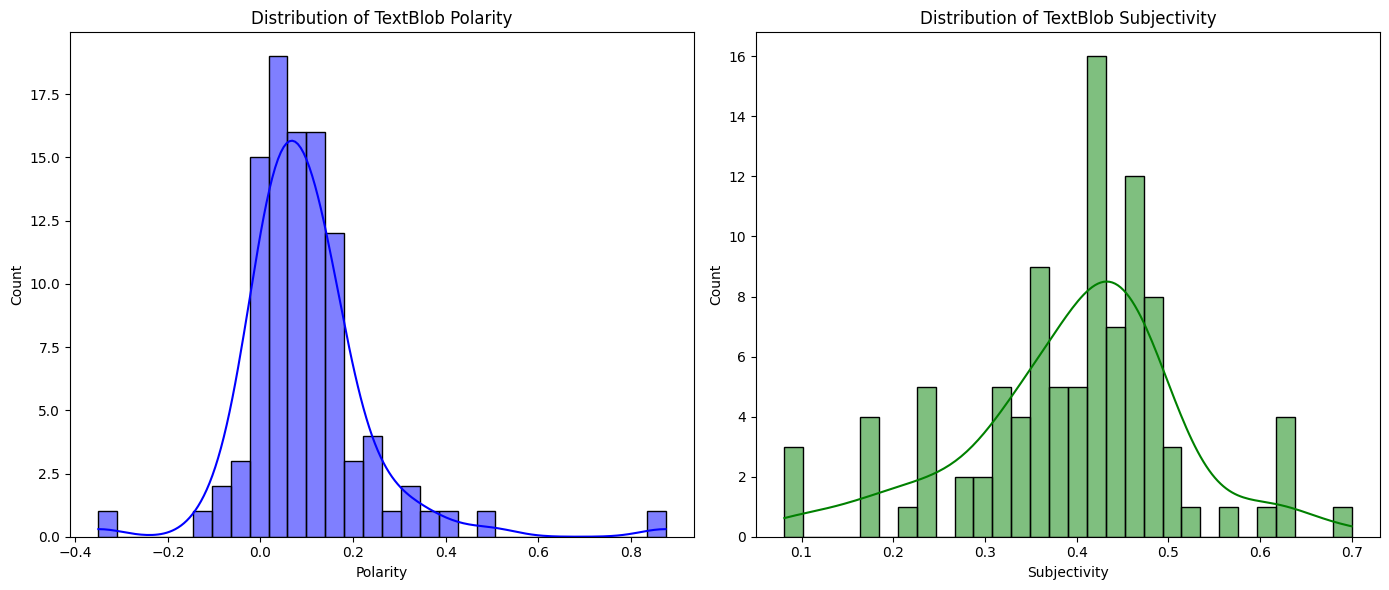

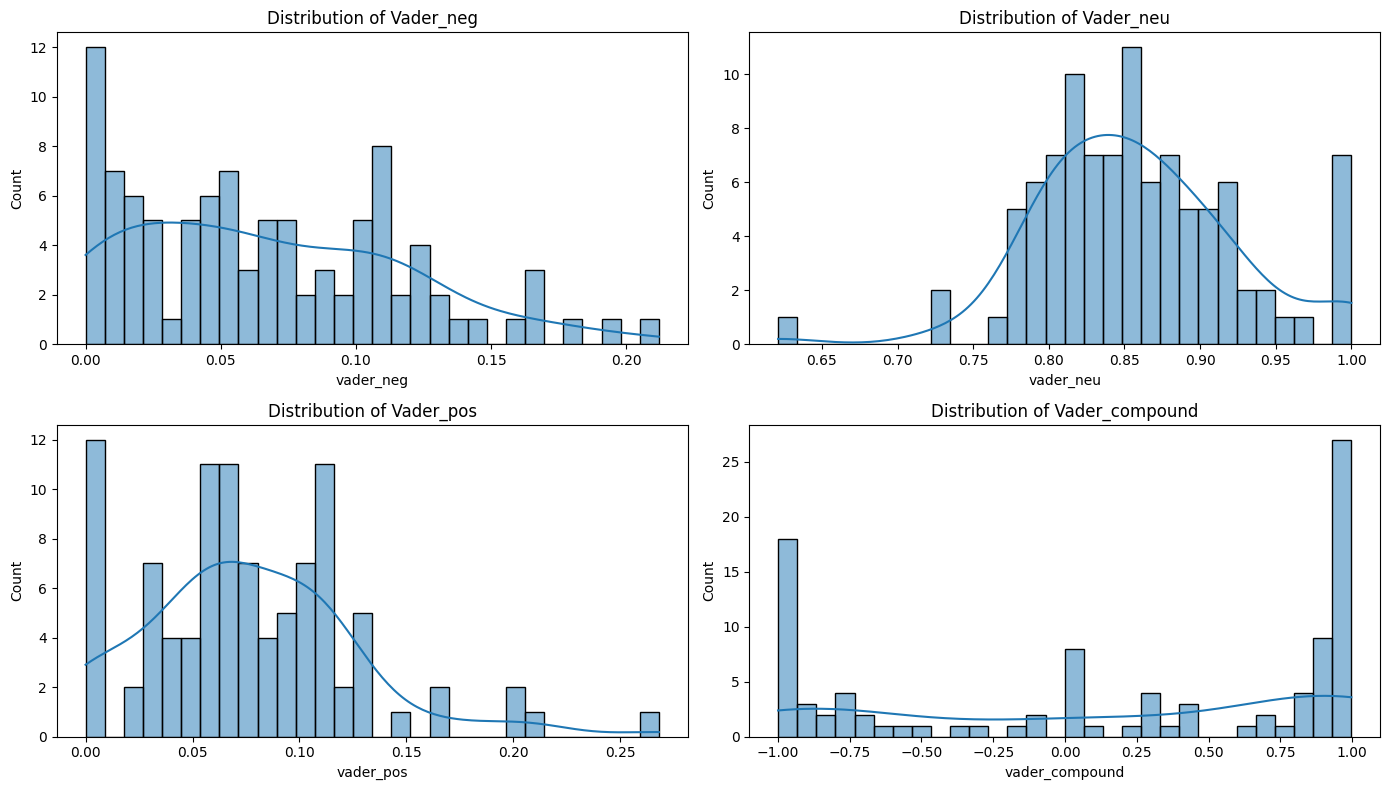

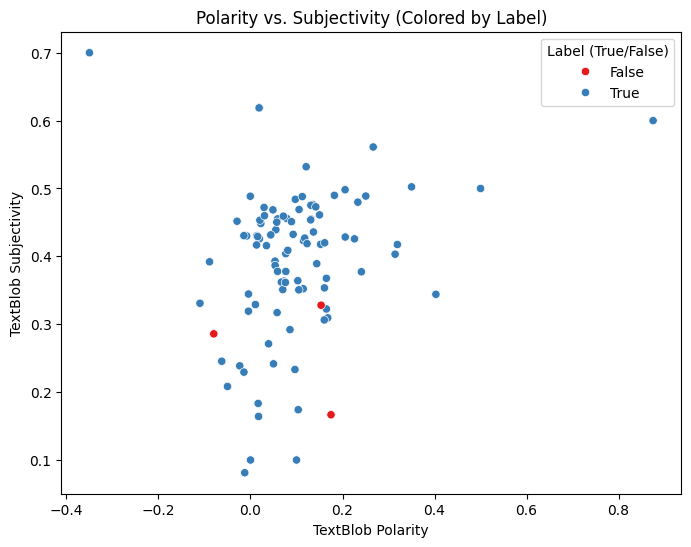

C:\Users\Amaan\AppData\Local\Temp\ipykernel_28268\2670335194.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='textblob_polarity', palette='Set2')
C:\Users\Amaan\AppData\Local\Temp\ipykernel_28268\2670335194.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='textblob_subjectivity', palette='Set2')
C:\Users\Amaan\AppData\Local\Temp\ipykernel_28268\2670335194.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='vader_compound', palette='Set2')


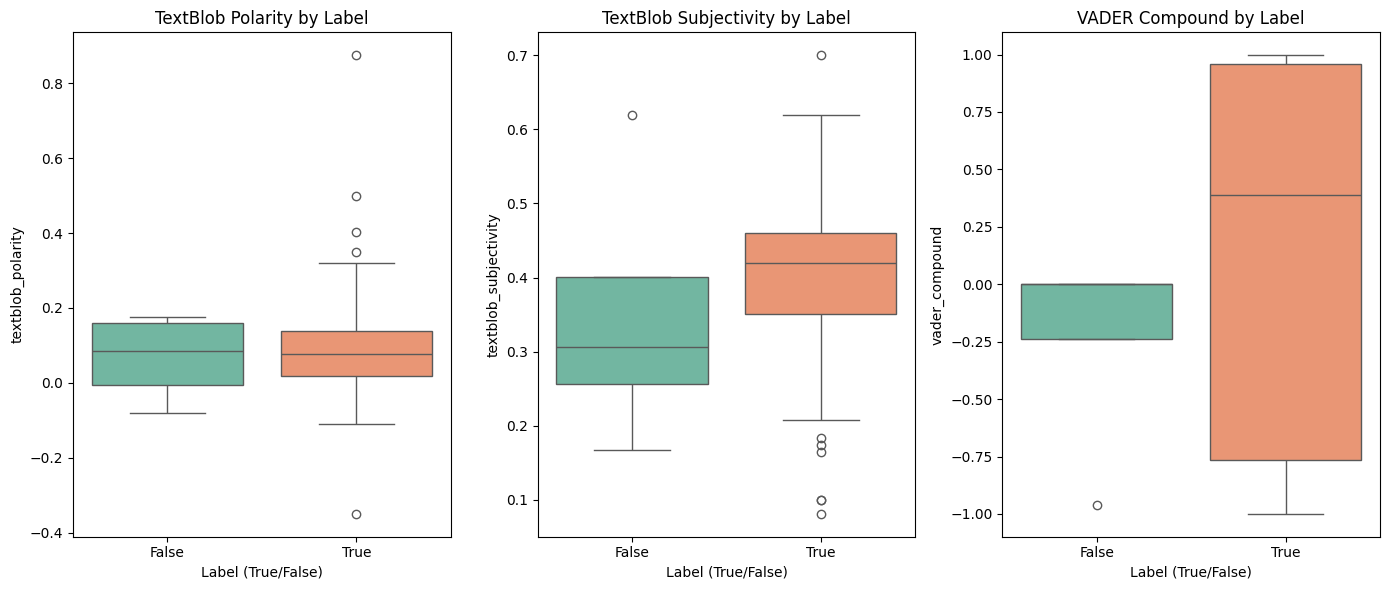

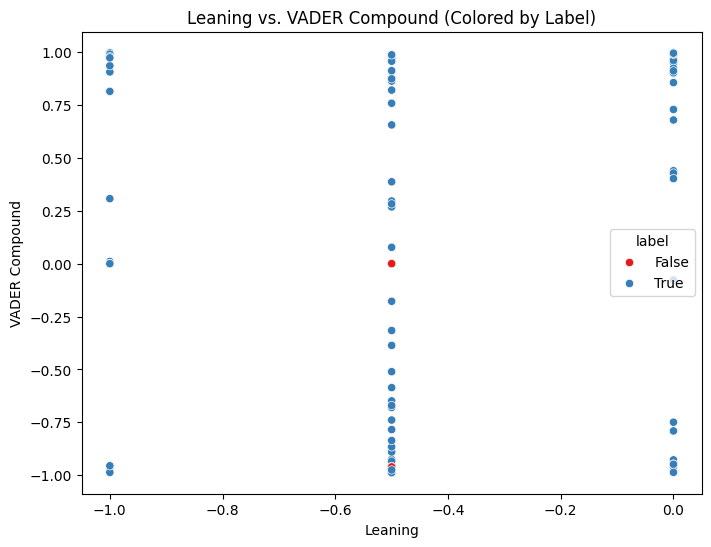

C:\Users\Amaan\AppData\Local\Temp\ipykernel_28268\2670335194.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  label_counts = df.groupby(['leaning_category', 'label']).size().unstack()


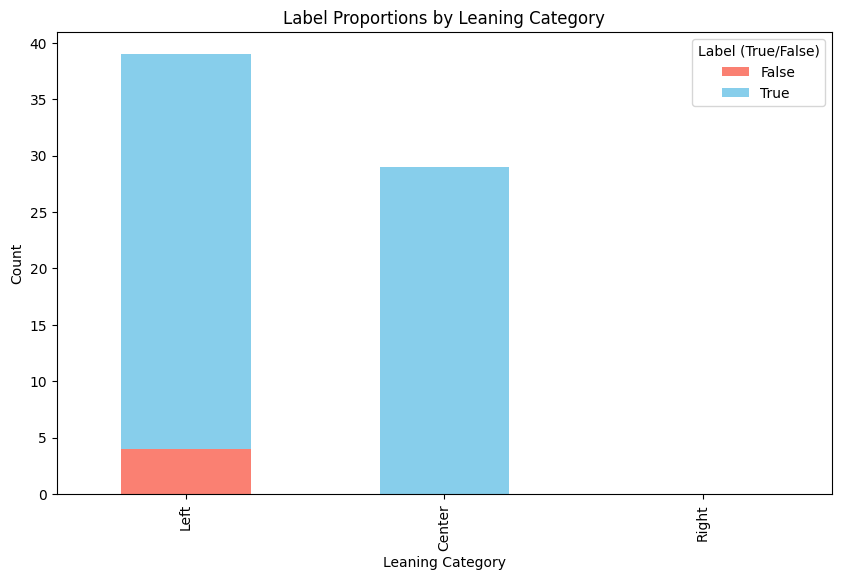

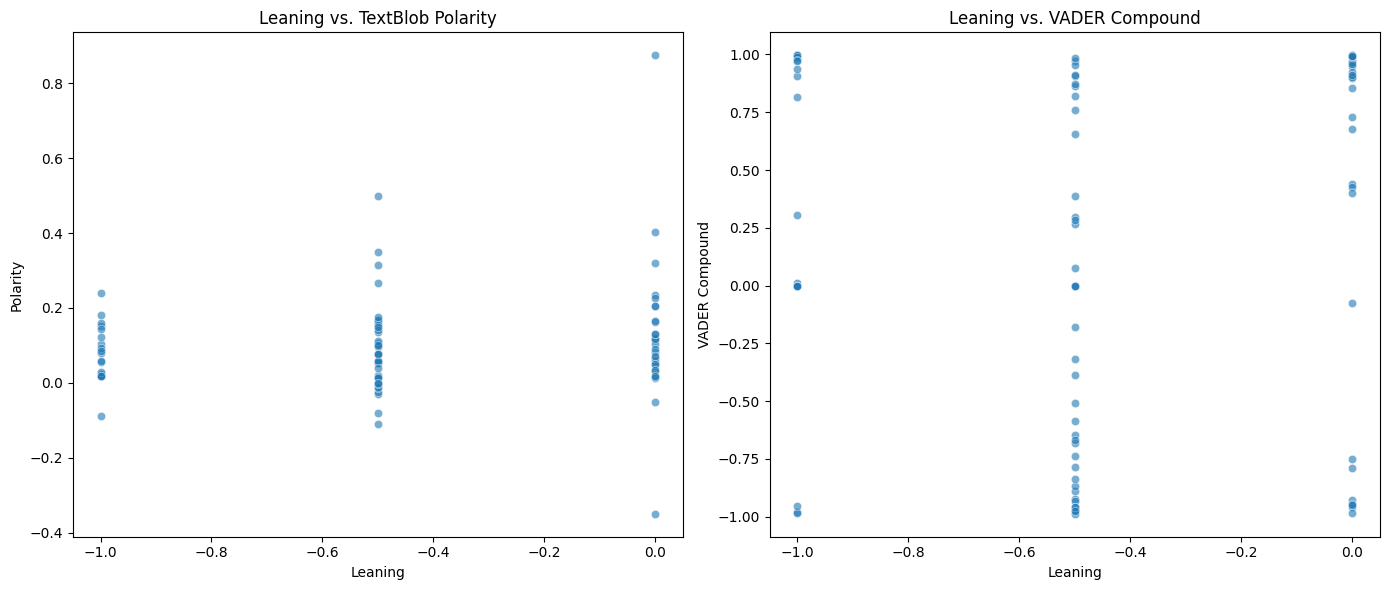

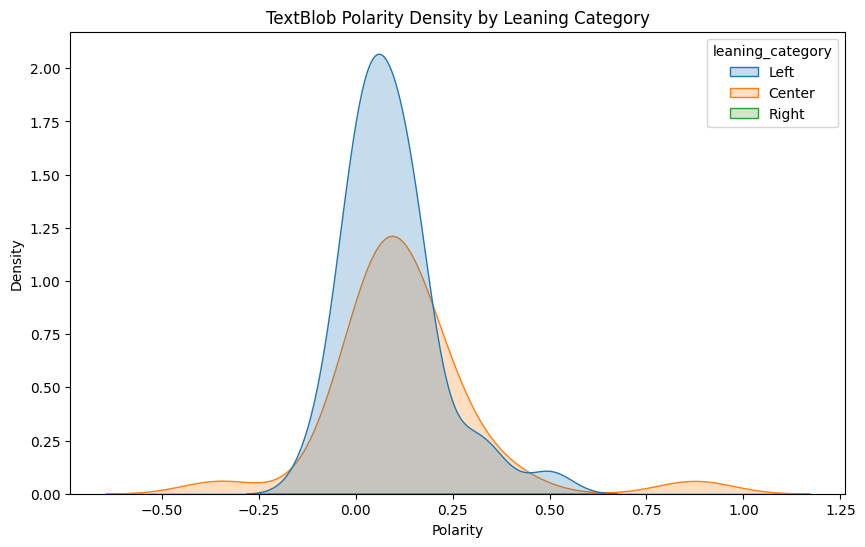

C:\Users\Amaan\AppData\Local\Temp\ipykernel_28268\2670335194.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='leaning', palette='Set2')


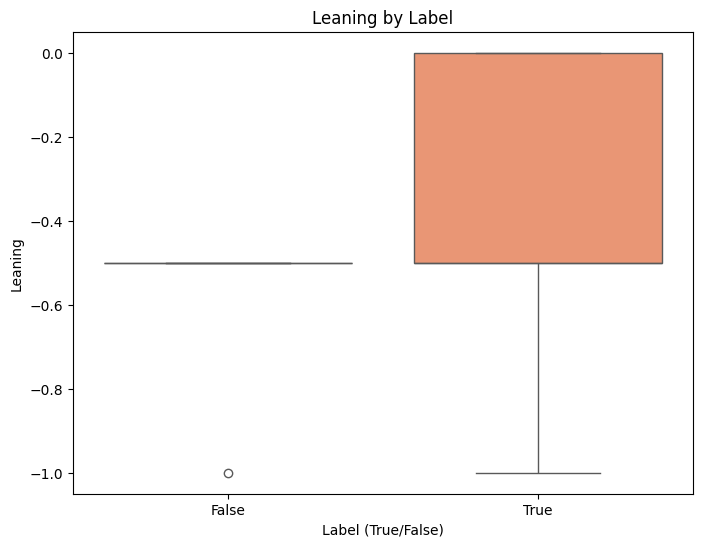

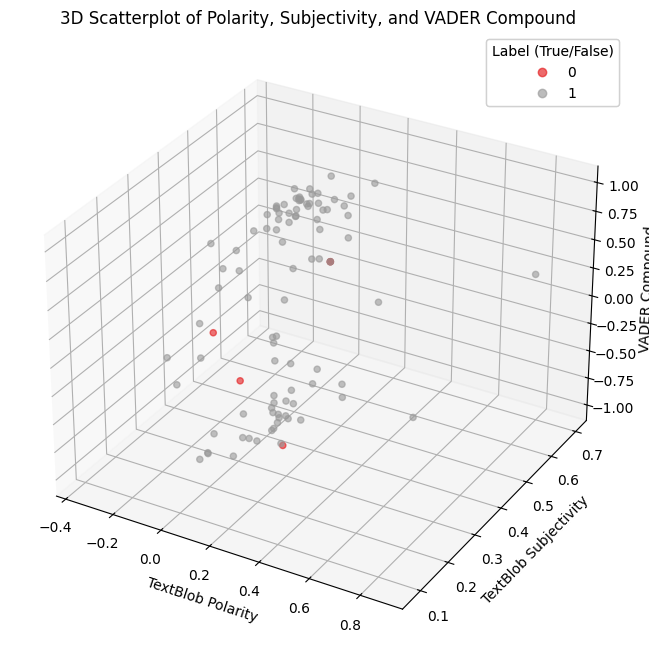

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [28]:
# 1. Distribution of TextBlob Sentiments
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['textblob_polarity'], kde=True, bins=30, color='blue')
plt.title('Distribution of TextBlob Polarity')
plt.xlabel('Polarity')

plt.subplot(1, 2, 2)
sns.histplot(df['textblob_subjectivity'], kde=True, bins=30, color='green')
plt.title('Distribution of TextBlob Subjectivity')
plt.xlabel('Subjectivity')

plt.tight_layout()
plt.show()

# 2. VADER Sentiment Distribution
plt.figure(figsize=(14, 8))
for i, col in enumerate(['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# 3. Scatterplot of Polarity vs. Subjectivity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='textblob_polarity', y='textblob_subjectivity', hue='label', palette='Set1')
plt.title('Polarity vs. Subjectivity (Colored by Label)')
plt.xlabel('TextBlob Polarity')
plt.ylabel('TextBlob Subjectivity')
plt.legend(title='Label (True/False)')
plt.show()

# # 4. Heatmap of Correlation
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Heatmap of Correlation')
# plt.show()

# 5. Sentiment and Label Comparison
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='label', y='textblob_polarity', palette='Set2')
plt.title('TextBlob Polarity by Label')
plt.xlabel('Label (True/False)')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='label', y='textblob_subjectivity', palette='Set2')
plt.title('TextBlob Subjectivity by Label')
plt.xlabel('Label (True/False)')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='label', y='vader_compound', palette='Set2')
plt.title('VADER Compound by Label')
plt.xlabel('Label (True/False)')

plt.tight_layout()
plt.show()

# 6. Leaning vs. Label Comparison
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='leaning', y='vader_compound', hue='label', palette='Set1')
plt.title('Leaning vs. VADER Compound (Colored by Label)')
plt.xlabel('Leaning')
plt.ylabel('VADER Compound')
plt.show()

# 7. Stacked Bar Chart of Label by Leaning Categories
df['leaning_category'] = pd.cut(df['leaning'], bins=[-1, -0.33, 0.33, 1], labels=['Left', 'Center', 'Right'])
label_counts = df.groupby(['leaning_category', 'label']).size().unstack()
label_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'skyblue'])
plt.title('Label Proportions by Leaning Category')
plt.xlabel('Leaning Category')
plt.ylabel('Count')
plt.legend(title='Label (True/False)')
plt.show()

# 8. Leaning vs. Sentiment
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='leaning', y='textblob_polarity', alpha=0.6)
plt.title('Leaning vs. TextBlob Polarity')
plt.xlabel('Leaning')
plt.ylabel('Polarity')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='leaning', y='vader_compound', alpha=0.6)
plt.title('Leaning vs. VADER Compound')
plt.xlabel('Leaning')
plt.ylabel('VADER Compound')

plt.tight_layout()
plt.show()

# 9. Leaning Sentiment Polarity Density
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='textblob_polarity', hue='leaning_category', fill=True)
plt.title('TextBlob Polarity Density by Leaning Category')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.show()

# 10. True vs. Fake Leaning Comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='label', y='leaning', palette='Set2')
plt.title('Leaning by Label')
plt.xlabel('Label (True/False)')
plt.ylabel('Leaning')
plt.show()

# 11. 3D Scatterplot of Polarity, Subjectivity, and VADER Compound
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['textblob_polarity'], df['textblob_subjectivity'], df['vader_compound'], c=df['label'], cmap='Set1', alpha=0.6)
ax.set_title('3D Scatterplot of Polarity, Subjectivity, and VADER Compound')
ax.set_xlabel('TextBlob Polarity')
ax.set_ylabel('TextBlob Subjectivity')
ax.set_zlabel('VADER Compound')
legend1 = ax.legend(*scatter.legend_elements(), title="Label (True/False)")
ax.add_artist(legend1)
plt.show()

# 12. Clustering with KMeans (PCA for visualization)
features = df[['textblob_polarity', 'textblob_subjectivity', 'vader_compound', 'leaning']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=df['cluster'], palette='Set2')
plt.title('KMeans Clustering (2D PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

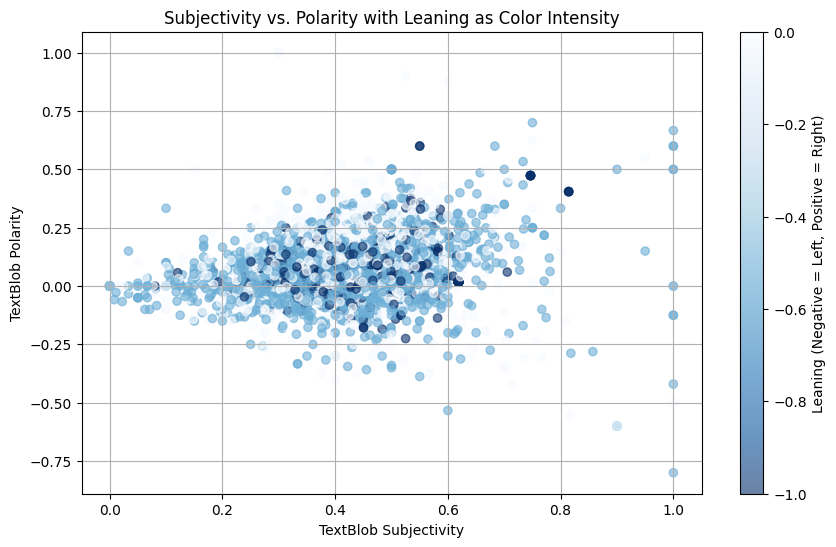

In [43]:
# Scatterplot of Subjectivity vs. Polarity with Leaning as Color Intensity

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['textblob_subjectivity'], df['textblob_polarity'], c=df['leaning'], cmap='Blues_r', alpha=0.6)
plt.title('Subjectivity vs. Polarity with Leaning as Color Intensity')
plt.xlabel('TextBlob Subjectivity')
plt.ylabel('TextBlob Polarity')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Leaning (Negative = Left, Positive = Right)')
plt.grid(True)
plt.show()


C:\Users\Amaan\AppData\Local\Temp\ipykernel_28268\2152646905.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='leaning_bin', y='textblob_subjectivity', palette='Set2')


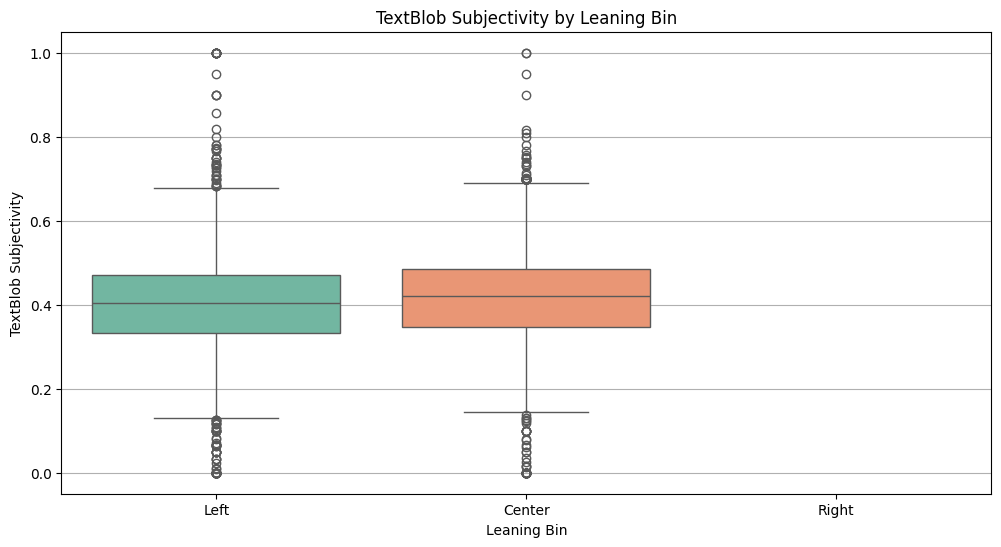

C:\Users\Amaan\AppData\Local\Temp\ipykernel_28268\2152646905.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='leaning_bin', y='textblob_polarity', palette='Set2')


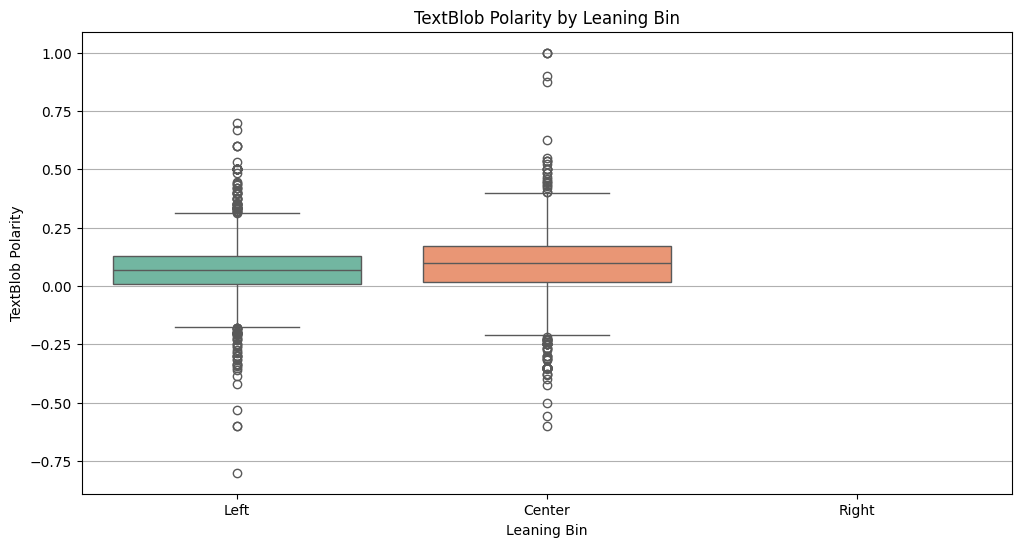

In [39]:
# Creating boxplots for Subjectivity and Polarity against Leaning
# For visualization purposes, I will create bins for the leaning scores and use those bins to create the boxplots.

# Create bins for 'leaning' (e.g., Left, Center, Right)
df['leaning_bin'] = pd.cut(df['leaning'], bins=[-1, -0.33, 0.33, 1], labels=['Left', 'Center', 'Right'])

# Boxplot for Subjectivity by Leaning Bin
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='leaning_bin', y='textblob_subjectivity', palette='Set2')
plt.title('TextBlob Subjectivity by Leaning Bin')
plt.xlabel('Leaning Bin')
plt.ylabel('TextBlob Subjectivity')
plt.grid(axis='y')
plt.show()

# Boxplot for Polarity by Leaning Bin
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='leaning_bin', y='textblob_polarity', palette='Set2')
plt.title('TextBlob Polarity by Leaning Bin')
plt.xlabel('Leaning Bin')
plt.ylabel('TextBlob Polarity')
plt.grid(axis='y')
plt.show()

